# DATA EXTRACTION

In [2]:
import os
import io
import gzip
import tarfile
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter
import fastavro

from astropy.time import Time
from astropy.io import fits
import astropy.units as u
import aplpy
%matplotlib inline

In [3]:
def find_files(root_dir):
    for dir_name, subdir_list, file_list in os.walk(root_dir, followlinks=True):
        for fname in file_list:
            if fname.endswith('.avro'):
                yield dir_name+'/'+fname

def open_avro(fname):
    with open(fname,'rb') as f:
        freader = fastavro.reader(f)
        schema = freader.writer_schema
        for packet in freader:
            yield packet
            
            
def make_dataframe(packet):
    dfc = pd.DataFrame(packet['candidate'], index=[0])
    df_prv = pd.DataFrame(packet['prv_candidates'])
    dflc = pd.concat([dfc,df_prv], ignore_index=True,sort=True)
    dflc.objectId = packet['objectId']
    dflc.candid = packet['candid']
    return dflc

### Code below includes: directory making, listing # of rows in candidate, listing # nans in magnr

ztf_public_20190302     ~10 sec   7 MB<br>
ztf_public_20180809     ~40 sec    32 MB<br>
ztf_public_20190519     ~2 min    107 MB<br>
ztf_public_20181215     ~8 min    410 MB<br>
ztf_public_20180601     ~  min    786 MB<br>

In [16]:
%%time

output_dir = 'D:/@Seattle/data/ztf_public_20180809'

obj_id = []
filename = []
candidate_len = []
nan_in_magnr = []
usable = []

for fname in find_files(output_dir):
    for packet in open_avro(fname):
        dflc = make_dataframe(packet)
        obj_id.append(packet['objectId'])
        a=os.path.split(fname)[1]
        fname=os.path.splitext(a)[0]
        filename.append(fname) 
        dfc = pd.DataFrame(packet['candidate'], index=[0])
        df_prv = pd.DataFrame(packet['prv_candidates'])
        dflc = pd.concat([dfc,df_prv], ignore_index=True,sort=True)
        candidate_len.append((dflc.shape[0]))
        nan_in_magnr.append(dflc.magnr.isna().sum())
        usable.append(((dflc.shape[0])-1)-dflc.magnr.isna().sum())
        


        

#this creates directory of from output_dir
directory=pd.DataFrame(columns=['objectId','filename','candlength','# of nans [magnr]','Available'])
for i in range(len(obj_id)-1):
    directory=directory.append({'objectId':obj_id[i],
                                'filename':filename[i],
                                'candlength':candidate_len[i],
                                '# of nans [magnr]':nan_in_magnr[i],
                                'Available':usable[i]}, ignore_index=True)

directory.insert(5,"Usability",(directory['Available']/directory['candlength'])*100, True)
print('directory now available')
directory[["candlength", 
           "# of nans [magnr]",
           "Available"]] = directory[["candlength", "# of nans [magnr]","Available"]].apply(pd.to_numeric)


directory now available
Wall time: 1min 9s


In [17]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(directory)

objectId            filename  candlength  # of nans [magnr]  \
0    ZTF18abedgrj  585152190015010001           2                  1   
1    ZTF18abedgrl  585152190015010002           2                  0   
2    ZTF18abmbbim  585152190015010003           2                  1   
3    ZTF18abmbbin  585152190015015006           2                  1   
4    ZTF18abmbbil  585152190015015014           2                  1   
5    ZTF18ablqgdh  585152190215010000           2                  0   
6    ZTF18abmbbij  585152190215010004           2                  1   
7    ZTF18ablqgdi  585152190215010005           2                  0   
8    ZTF18abmbbii  585152190215015001           2                  1   
9    ZTF18abmbbik  585152190215015004           2                  1   
10   ZTF18abedgsa  585152190415010002           2                  0   
11   ZTF18abmbbib  585152190415015005           2                  1   
12   ZTF18abmbbhz  585152190415015007           2                  1   
13   ZTF18abmbbia  585152190415015011           2                  1   
14   ZTF18abedgrw  585152190415015013           2                  0   
15   ZTF18abmbbhu  585152191615010000           3                  2   
16   ZTF18abcigoz  585152191615010001           3                  1   
17   ZTF18abmbbhx  585152191615015006           3                  2   
18   ZTF18abmbbhw  585152191615015012           2                  1   
19   ZTF18abmbbhv  585152191615015014           2                  1   
20   ZTF18abbpxaf  585152191615015015           2                  0   
21   ZTF18abbpwtc  585152193215010002           2                  0   
22   ZTF18abcigpx  585152193215015001           3                  0   
23   ZTF18abmbbid  585152193215015002           2                  1   
24   ZTF18abmbbif  585152193215015003           2                  1   
25   ZTF18abmbbih  585152193215015004           3                  2   
26   ZTF18abmbbie  585152193215015005           2                  1   
27   ZTF18abmbbig  585152193215015008           3                  2   
28   ZTF18abcigrd  585152193315010002           2                  0   
29   ZTF18abcigre  585152193315010005           3                  0   
30   ZTF18abmbbhs  585152193315015010           2                  1   
31   ZTF18abmbbhq  585152193615015002           2                  1   
32   ZTF18abmbbhp  585152193615015003           2                  1   
33   ZTF18abdcagy  585152193615015004           2                  0   
34   ZTF18ablqfxe  585152193615015005           2                  0   
35   ZTF18abmbbho  585152193615015008           2                  1   
36   ZTF18ablqfxc  585152193615015013           2                  0   
37   ZTF18abmbbhr  585152193615015014           2                  1   
38   ZTF18abdcajp  585152194815010000           3                  0   
39   ZTF18abdgdfu  585152194815010001           2                  1   
40   ZTF18abdgdft  585152194815010003           2                  0   
41   ZTF18abcilcx  585152194815015002           3                  1   
42   ZTF18abmbbht  585152194815015009           3                  2   
43   ZTF18abbpxbn  585152194915015002           2                  1   
44   ZTF18abmbbhm  585152194915015005           2                  1   
45   ZTF18abbpxbk  585152194915015007           2                  1   
46   ZTF18abmbbhn  585152194915015009           2                  1   
47   ZTF18abmbbhl  585152195015015008           2                  1   
48   ZTF18abdcagp  585152195015015010           2                  0   
49   ZTF18abedgpt  585152195115010004           2                  0   
50   ZTF18abmbbhy  585152195115010005           2                  1   
51   ZTF18ablqgjh  585152195115015000           2                  0   
52   ZTF18abalpdy  585152195215010001           2                  0   
53   ZTF18abcigql  585152195215010002           2                  0   
54   ZTF18abalpdw  585152195215015000           2

In [6]:
#filter through directory
cond= (directory['candlength']> 10) & (directory['Usability'] < 10) & (directory['Usability']> 0)
#cond= (directory['Usability']> 0) & (directory['Usability']< 20)
#print(directory.index[cond].tolist())

display(directory.loc[directory.index[cond]])

#directory.loc[directory['Available'].idxmax()]


objectId            filename  candlength  # of nans [magnr]  Available  \
6  ZTF18aciacgx  790171312815015003          14                 12          1   

  Usability  
6   7.14286

In [26]:
%%time
# retrieve data from object
n = 78
obj = directory.objectId[n] #obj from list
fn = directory.filename[n]
for fname in find_files(output_dir):
    for packet in open_avro(fname):
        dflc = make_dataframe(packet)
        if packet['objectId'] == obj:            
            dfc = pd.DataFrame(packet['candidate'], index=[0])
            df_prv = pd.DataFrame(packet['prv_candidates'])
            dflc = pd.concat([dfc,df_prv], ignore_index=True,sort=True)
            if dflc.magnr.isna().sum()>15:
                print('{} Nans in packet with {} detections. Might cause error in DC mag compute.'.format(dflc.magnr.isna().sum(),
                                                                                                          len(packet['candidate'])
                                                                                                         ))
            print('New dflc for obj: {} (f:{}) created'.format(packet['objectId'],fn))
            #print('hi')
            break 
    if packet['objectId'] == obj:   #first if only breaks from mid-for
        break




New dflc for obj: ZTF18aaylbod (f:585153141915015005) created
Wall time: 3.71 s


In [27]:
#to check
fnamex = '{}/{}.avro'.format(output_dir,fn)
with open(fnamex,'rb') as f:    #read fname in binary
    freader = fastavro.reader(f)
    schema = freader.writer_schema
    for packetx in freader:
        print(packetx['objectId'])
        
dflc2 = make_dataframe(packetx)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(dflc2)

ZTF18aaylbod


aimage  aimagerat  bimage  bimagerat              candid  chinr    chipsf  \
0   0.906   0.359524   0.738   0.292857  585153141915015005  0.394  1.916693   
1     NaN        NaN     NaN        NaN  585153141915015005    NaN       NaN   
2     NaN        NaN     NaN        NaN  585153141915015005    NaN       NaN   
3     NaN        NaN     NaN        NaN  585153141915015005    NaN       NaN   
4     NaN        NaN     NaN        NaN  585153141915015005    NaN       NaN   
5     NaN        NaN     NaN        NaN  585153141915015005    NaN       NaN   
6     NaN        NaN     NaN        NaN  585153141915015005    NaN       NaN   
7     NaN        NaN     NaN        NaN  585153141915015005    NaN       NaN   
8   0.831   0.719018   0.687   0.594422  585153141915015005  0.838  2.786060   
9     NaN        NaN     NaN        NaN  585153141915015005    NaN       NaN   

   classtar  clrcoeff  clrcounc  clrmed   clrrms        dec      decnr  \
0     0.991  0.106901  0.000007   0.535  0.28427  10.458746  10.458814   
1       NaN       NaN       NaN     NaN      NaN        NaN        NaN   
2       NaN       NaN       NaN     NaN      NaN        NaN        NaN   
3       NaN       NaN       NaN     NaN      NaN        NaN        NaN   
4       NaN       NaN       NaN     NaN      NaN        NaN        NaN   
5       NaN       NaN       NaN     NaN      NaN        NaN        NaN   
6       NaN       NaN       NaN     NaN      NaN        NaN        NaN   
7       NaN       NaN       NaN     NaN      NaN        NaN        NaN   
8     0.818       NaN       NaN     NaN      NaN  10.458830  10.458814   
9       NaN       NaN       NaN     NaN      NaN        NaN        NaN   

   diffmaglim    distnr  distpsnr1  distpsnr2  distpsnr3    dsdiff    dsnrms  \
0   19.864912  0.251183   0.195158   7.426993   9.181559 -6.824625  3.500695   
1   20.383301       NaN        NaN        NaN        NaN       NaN       NaN   
2   20.528000       NaN        NaN        NaN        NaN       NaN       NaN   
3   19.554001       NaN        NaN        NaN        NaN       NaN       NaN   
4   19.360300       NaN        NaN        NaN        NaN       NaN       NaN   
5   19.033001       NaN        NaN        NaN        NaN       NaN       NaN   
6   19.249201       NaN        NaN        NaN        NaN       NaN       NaN   
7   19.322599       NaN        NaN        NaN        NaN       NaN       NaN   
8   20.427200  0.409197        NaN        NaN        NaN       NaN       NaN   
9   20.330700       NaN        NaN        NaN        NaN       NaN       NaN   

      elong  fid  field     fwhm isdiffpos            jd     jdendhist  \
0  1.227642    2  532.0  2.52000         t  2.458340e+06  2.458340e+06   
1       NaN    2    NaN      NaN      None  2.458313e+06           NaN   
2       NaN    2    NaN      NaN      None  2.458313e+06           NaN   
3       NaN    2    NaN      NaN      None  2.458316e+06           NaN   
4       NaN    2    NaN      NaN      None  2.458316e+06           NaN   
5       NaN    2    NaN      NaN      None  2.458328e+06           NaN   
6       NaN    2    NaN      NaN      None  2.458331e+06           NaN   
7       NaN    2    NaN      NaN      None  2.458333e+06           NaN   
8  1.209610    2  533.0  1.15574         t  2.458334e+06           NaN   
9       NaN    2    NaN      NaN      None  2.458337e+06           NaN   

       jdendref   jdstarthist    jdstartref      magap   magapbig   magdiff  \
0  2.458259e+06  2.458277e+06  2.458187e+06  19.637199  19.522400  0.249789   
1           NaN           NaN           NaN        NaN        NaN       NaN   
2           NaN           NaN           NaN        NaN        NaN       NaN   
3           NaN           NaN           NaN        NaN        NaN       NaN   
4           NaN           NaN           NaN        NaN        NaN       NaN   
5           NaN           NaN           NaN        NaN        NaN       NaN   
6           NaN           NaN           NaN        NaN    

# + DC MAGNITUDE


In [9]:
display(dflc.loc[0,['distpsnr1','sgscore1']])   #determine if nearest PS1 sourse coincident and stellar
                                        #distpsnr1 = Distance of closest source from PS1 catalog; if exists within 30 arcsec [arcsec]
                                        #sgscore1 = Star/Galaxy score. higher score = higher chance of being a star
display(dflc['distnr'])   #confirm that the nearest reference source from ZTF is also coincident
display(dflc[['magnr','sigmagnr']])   #If only upper limits (previous detection)--infer thru other observations, if possible.  
                            #`magnr` will depend on the field, chip x quadrant (`rcid`), and filter.
# convert isdiffpos into a +/- 1 value.  isdiffpos is None for nondetections

distpsnr1    0.365188
sgscore1     0.852375
Name: 0, dtype: object

0     0.273070
1     0.832757
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
Name: distnr, dtype: float64

magnr  sigmagnr
0   12.377     0.036
1   12.871     0.037
2      NaN       NaN
3      NaN       NaN
4      NaN       NaN
5      NaN       NaN
6      NaN       NaN
7      NaN       NaN
8      NaN       NaN
9      NaN       NaN
10     NaN       NaN
11     NaN       NaN
12     NaN       NaN
13     NaN       NaN

In [20]:
def get_dcmag(dflc, match_radius_arcsec=1.5, star_galaxy_threshold = 0.4,band=2):
    if (dflc.loc[0,'distpsnr1'] > match_radius_arcsec) & (dflc.loc[0,'sgscore1'] < star_galaxy_threshold):
        print('Object is not a variable star.')
                
    else:
        dflc=dflc.fillna(np.nan)
        def robust_median(x):
            if len(x) == 0:
                return np.nan
            else:
                return np.median(x[np.isfinite(x)])
        grp = dflc.groupby(['fid','field','rcid'])
        impute_magnr = grp['magnr'].agg(robust_median)
        #print(impute_magnr)
        impute_sigmagnr = grp['sigmagnr'].agg(robust_median)
        #print(impute_sigmagnr)
        for idx, grpi in grp:
            w = np.isnan(grpi['magnr'])
            w2 = grpi[w].index
            dflc.loc[w2,'magnr'] = impute_magnr[idx]
            dflc.loc[w2,'sigmagnr'] = impute_sigmagnr[idx]
        dflc['sign'] = 2* (dflc['isdiffpos'] == 't') - 1
        
        dflc['dc_mag'] = -2.5 * np.log10(10**(-0.4*dflc['magnr']) + dflc['sign'] * 10**(-0.4*dflc['magpsf']))   #u
        dflc['dc_sigmag'] = np.sqrt(
            (10**(-0.4*dflc['magnr'])* dflc['sigmagnr']) **2. + 
            (10**(-0.4*dflc['magpsf']) * dflc['sigmapsf'])**2.) / 10**(-0.4*dflc['magnr']) + dflc['sign'] * 10**(-0.4*dflc['magpsf']) #u
        dflc['dc_mag_ulim'] = -2.5 * np.log10(10**(-0.4*dflc['magnr']) + 10**(-0.4*dflc['diffmaglim']))   #v
        dflc['dc_mag_llim'] = -2.5 * np.log10(10**(-0.4*dflc['magnr']) - 10**(-0.4*dflc['diffmaglim']))   #v2
        
        def band_amplitude(dflc, band=2):
            z = dflc[dflc.fid==band]
            ampli=z['magpsf'].max()-z['magpsf'].min()
            print('Max:',z['magpsf'].max())
            print('Min:',z['magpsf'].min())
            print('Amplitude:',ampli)
            print('Is amplitude > 1.0 mag?',ampli>=1)
            return ampli
        
        #band_amplitude(dflc)
            
        ans = None
        if band_amplitude(dflc) <=1:
            while ans not in('Y','N'):
                ans = input('Keep data? Y/N:')
                if ans == 'N':
                    break
                elif ans == 'Y':
                     continue 
                else:
                    print('Y/N:')
        
        if ans=='Y' or band_amplitude(dflc)>=1:            
            def plot_dc_lightcurve(dflc, days_ago=True):

                plt.rcParams["figure.figsize"] = (10,7)

                filter_color = {1:'green', 2:'red', 3:'pink'}
                if days_ago:
                    now = Time.now().jd
                    t = dflc.jd - now
                    xlabel = 'Days Ago'
                else:
                    t = dflc.jd
                    xlabel = 'Time (JD)'

                plt.figure()
                for fid, color in filter_color.items():
                    # plot detections in this filter:
                    w = (dflc.fid == fid) & ~dflc.magpsf.isnull()
                    if np.sum(w):
                        plt.errorbar(t[w],dflc.loc[w,'dc_mag'], dflc.loc[w,'dc_sigmag'],fmt='.',color=color)
                    wnodet = (dflc.fid == fid) & dflc.magpsf.isnull()
                    if np.sum(wnodet):
                        plt.scatter(t[wnodet],dflc.loc[wnodet,'dc_mag_ulim'], marker='v',color=color,alpha=0.25)
                        plt.scatter(t[wnodet],dflc.loc[wnodet,'dc_mag_llim'], marker='^',color=color,alpha=0.25)


                plt.gca().invert_yaxis()
                plt.xlabel(xlabel)
                plt.ylabel('Magnitude')


            ans = None
            while ans not in('Y','N'):
                ans = input('Plot data? Y/N:')
                if ans == 'Y':
                    plot_dc_lightcurve(dflc)
                elif ans == 'N':
                    return
                else:
                    print('Y/N:')
            
            

            

Max: 19.38741111755371
Min: 19.38741111755371
Amplitude: 0.0
Is amplitude > 1.0 mag? False
Keep data? Y/N:Y
Plot data? Y/N:Y


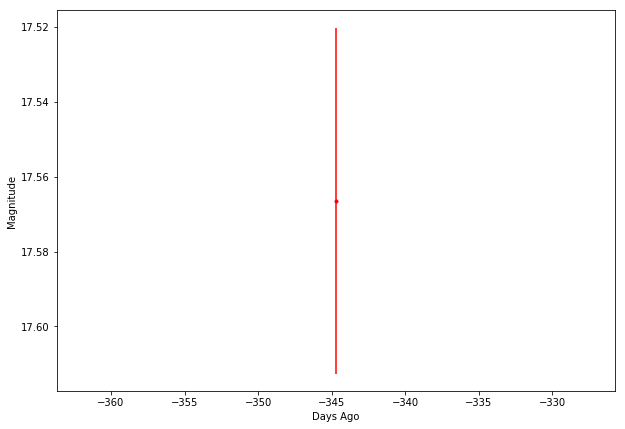

In [30]:
get_dcmag(dflc.iloc[0:7])

C:\Users\Mikha_PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Mikha_PC\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Max: 17.420799255371094
Min: 17.261499404907227
Amplitude: 0.1592998504638672
Is amplitude > 1.0 mag? False
Keep data? Y/N:Y
Plot data? Y/N:Y


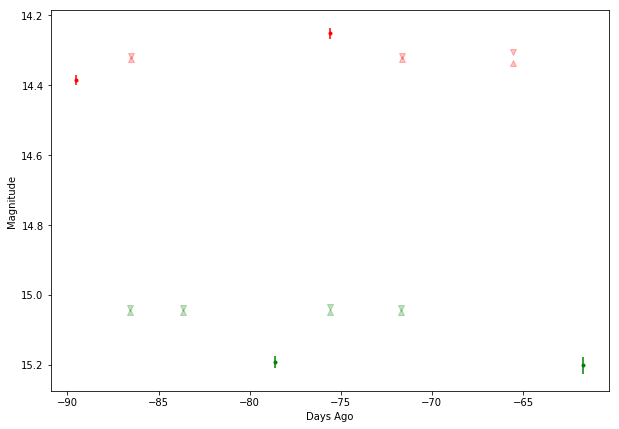

In [31]:
get_dcmag(dflc)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

C:\Users\Mikha_PC\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Mikha_PC\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Mikha_PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log10

### Source Code

In [29]:
def is_star(dflc, match_radius_arcsec=1.5, star_galaxy_threshold = 0.4):
    return (dflc.loc[0,'distpsnr1'] < match_radius_arcsec) & (dflc.loc[0,'sgscore1'] > star_galaxy_threshold)

print('is this a (variable) star? {}'.format(is_star(dflc)))

is this a (variable) star? True


In [ ]:
#dflc=dflc.fillna(np.nan)
def robust_median(x):
    x = x.fillna(np.nan)
    if len(x) == 0:
        return np.nan
    
    else:
        return np.median(x[np.isfinite(x)])

grp = dflc.groupby(['fid','field','rcid'])
impute_magnr = grp['magnr'].agg(robust_median)
print(impute_magnr)
impute_sigmagnr = grp['sigmagnr'].agg(robust_median)
print(impute_sigmagnr)


for idx, grpi in grp:
    w = np.isnan(grpi['magnr'])
    w2 = grpi[w].index
    dflc.loc[w2,'magnr'] = impute_magnr[idx]
    dflc.loc[w2,'sigmagnr'] = impute_sigmagnr[idx]

In [ ]:
dflc['sign'] = 2* (dflc['isdiffpos'] == 't') - 1
#display(dflc['sign']) 

In [ ]:
#u = 10**(-0.4*dflc['magnr']) + dflc['sign'] * 10**(-0.4*dflc['magpsf'])
#v = 10**(-0.4*dflc['magnr']) + 10**(-0.4*dflc['diffmaglim'])
#v2= 10**(-0.4*dflc['magnr']) - 10**(-0.4*dflc['diffmaglim'])
dflc['dc_mag'] = -2.5 * np.log10(10**(-0.4*dflc['magnr']) + dflc['sign'] * 10**(-0.4*dflc['magpsf']))   #u
dflc['dc_sigmag'] = np.sqrt(
    (10**(-0.4*dflc['magnr'])* dflc['sigmagnr']) **2. + 
    (10**(-0.4*dflc['magpsf']) * dflc['sigmapsf'])**2.) / 10**(-0.4*dflc['magnr']) + dflc['sign'] * 10**(-0.4*dflc['magpsf']) #u
dflc['dc_mag_ulim'] = -2.5 * np.log10(10**(-0.4*dflc['magnr']) + 10**(-0.4*dflc['diffmaglim']))   #v
dflc['dc_mag_llim'] = -2.5 * np.log10(10**(-0.4*dflc['magnr']) - 10**(-0.4*dflc['diffmaglim']))   #v2

In [ ]:
def band_amplitude(dflc, band=2):
    z = dflc[dflc.fid==band]
    q=z['magpsf'].max()-z['magpsf'].min()
    print('Max:',z['magpsf'].max())
    print('Min:',z['magpsf'].min())
    print('Amplitude:',q)
    print('Is amplitude > 1.0 mag?',q>=1)

band_amplitude(dflc)

In [ ]:
def plot_dc_lightcurve(dflc, days_ago=True):
    
    plt.rcParams["figure.figsize"] = (10,7)
    
    filter_color = {1:'green', 2:'red', 3:'pink'}
    if days_ago:
        now = Time.now().jd
        t = dflc.jd - now
        xlabel = 'Days Ago'
    else:
        t = dflc.jd
        xlabel = 'Time (JD)'
    
    plt.figure()
    for fid, color in filter_color.items():
        # plot detections in this filter:
        w = (dflc.fid == fid) & ~dflc.magpsf.isnull()
        if np.sum(w):
            plt.errorbar(t[w],dflc.loc[w,'dc_mag'], dflc.loc[w,'dc_sigmag'],fmt='.',color=color)
        wnodet = (dflc.fid == fid) & dflc.magpsf.isnull()
        if np.sum(wnodet):
            plt.scatter(t[wnodet],dflc.loc[wnodet,'dc_mag_ulim'], marker='v',color=color,alpha=0.25)
            plt.scatter(t[wnodet],dflc.loc[wnodet,'dc_mag_llim'], marker='^',color=color,alpha=0.25)

    
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel)
    plt.ylabel('Magnitude')
    

In [ ]:
plot_dc_lightcurve(dflc)

aimage  aimagerat  bimage  bimagerat        candid  chinr     chipsf  \
0    0.764   0.567474   0.674   0.500625  7.901713e+17  3.000   1.081154   
1    0.844   0.643949   0.763   0.582148  7.602021e+17  3.136  94.331596   
2      NaN        NaN     NaN        NaN           NaN    NaN        NaN   
3      NaN        NaN     NaN        NaN           NaN    NaN        NaN   
4      NaN        NaN     NaN        NaN           NaN    NaN        NaN   
5      NaN        NaN     NaN        NaN           NaN    NaN        NaN   
6      NaN        NaN     NaN        NaN           NaN    NaN        NaN   
7      NaN        NaN     NaN        NaN           NaN    NaN        NaN   
8      NaN        NaN     NaN        NaN           NaN    NaN        NaN   
9      NaN        NaN     NaN        NaN           NaN    NaN        NaN   
10     NaN        NaN     NaN        NaN           NaN    NaN        NaN   
11     NaN        NaN     NaN        NaN           NaN    NaN        NaN   
12     NaN        NaN     NaN        NaN           NaN    NaN        NaN   
13     NaN        NaN     NaN        NaN           NaN    NaN        NaN   

    classtar  clrcoeff  clrcounc     ...       tooflag         xpos  \
0      0.894  0.612047  0.022116     ...           0.0  2627.634521   
1      0.997       NaN       NaN     ...           NaN  2607.070068   
2        NaN       NaN       NaN     ...           NaN          NaN   
3        NaN       NaN       NaN     ...           NaN          NaN   
4        NaN       NaN       NaN     ...           NaN          NaN   
5        NaN       NaN       NaN     ...           NaN          NaN   
6        NaN       NaN       NaN     ...           NaN          NaN   
7        NaN       NaN       NaN     ...           NaN          NaN   
8        NaN       NaN       NaN     ...           NaN          NaN   
9        NaN       NaN       NaN     ...           NaN          NaN   
10       NaN       NaN       NaN     ...           NaN          NaN   
11       NaN       NaN       NaN     ...           NaN          NaN   
12       NaN       NaN       NaN     ...           NaN          NaN   
13       NaN       NaN       NaN     ...           NaN          NaN   

          ypos  zpclrcov   zpmed  sign     dc_mag  dc_sigmag  dc_mag_ulim  \
0   537.107117 -0.012789  21.878     1  12.182574   0.054997    12.264677   
1   558.843018       NaN     NaN    -1  12.938483   0.037116    12.870239   
2          NaN       NaN     NaN    -1        NaN        NaN    12.870187   
3          NaN       NaN     NaN    -1        NaN        NaN    12.376517   
4          NaN       NaN     NaN    -1        NaN        NaN    12.870225   
5          NaN       NaN     NaN    -1        NaN        NaN    12.870037   
6          NaN       NaN     NaN    -1        NaN        NaN    12.376241   
7          NaN       NaN     NaN    -1        NaN        NaN    12.867862   
8          NaN       NaN     NaN    -1        NaN        NaN    12.375157   
9          NaN       NaN     NaN    -1        NaN        NaN    12.373235   
10         NaN       NaN     NaN    -1        NaN        NaN    12.867094   
11         NaN       NaN     NaN    -1        NaN        NaN    12.376211   
12         NaN       NaN     NaN    -1        NaN        NaN    12.869910   
13         NaN       NaN     NaN    -1        NaN        NaN    12.376483   

    dc_mag_llim  
0     12.502298  
1     12.871762  
2     12.871814  
3     12.377483  
4     12.871776  
5     12.871964  
6     12.377759  
7     12.874148  
8     12.378846  
9     12.380778  
10    12.874921  
11    12.377789  
12    12.872092  
13    12.377517  

[14 rows x 106 columns]